In [40]:
import numpy as np
import pandas as pd
from functools import partial
from matplotlib import pyplot as plt

In [41]:
def rosenbrock(x):
    return 100*(x[0]**2 - x[1])**2 + (1 - x[0])**2


In [42]:
def partial_deriv(f, x, i):
    # TODO: vectorize
    eps = np.zeros(len(x))
    eps[i] = 0.000001
    deriv = (f(x+eps) - f(x-eps)) / (2*eps[i])
    return deriv

def gradient(f, x):
    # gradient of f at x
    g = np.zeros(len(x))
    for i in range(len(x)):
        g[i] = partial_deriv(f, x, i)
    return g.T

def hessian(f, x):
    gradient_functions = [partial(lambda x, idx: gradient(f, x)[idx], idx=i) for i in range(len(x))]
    hesse_matrix = np.array([gradient(g, x) for g in gradient_functions])
    return hesse_matrix

In [43]:
hessian(rosenbrock, (1,2))

array([[ 402.01442175, -400.01069124],
       [-400.01069124,  200.02133283]])

In [44]:
def armijo_get_alpha(f, d, x, sigma, G):
    alpha = 1
    while f(x + alpha*d) >= (f(x) + sigma*alpha * np.dot(G, d)):
        assert np.dot(G, d) <= 0
        alpha = alpha/2
    return alpha

In [45]:
def armijo_newton_optimization(f, x, do_print=True):
    eps = 0.01
    sigma = 0.8
    nit = 0
    G = gradient(f, x)
    
    while np.sum(np.abs(G)) >= eps:
        H = hessian(f, x)
        d = np.linalg.solve(H, -G)
        
        alpha = armijo_get_alpha(f, d, x, sigma, G)

        x = x + alpha*d
        if do_print: print(f"f={f(x)} at x={x}")
        G = gradient(f, x)
        nit += 1
        if do_print: print(f"Iteration: {nit}, Gradient: {G}")
    return x

In [46]:

def armijo_gradient_optimization(f, x, do_print=True):
    eps  = 0.01
    sigma = 0.8
    nit = 0
    G = gradient(f, x)
    d = -G
    if do_print: print(G)
    while np.sum(np.abs(G)) >= eps:
        alpha = armijo_get_alpha(f, d, x, sigma, G)
        x = x + alpha*d
        if do_print: print(f"f={f(x)} at x={x}")
        G = gradient(f, x)
        d = -G   
        nit += 1
        if do_print: print(f"Iteration: {nit}, Gradient: {G}")
    return x

## Anwendung von Newton auf Rosenbrock

In [47]:
armijo_newton_optimization(rosenbrock, (-1, 1))

f=3.5399690462340465 at x=[-0.87497641  0.74995283]
Iteration: 1, Gradient: [-9.22061936 -3.12617943]
f=3.163087582121417 at x=[-0.76137068  0.55505588]
Iteration: 2, Gradient: [-11.02359298  -4.92588682]
f=2.903729561925053 at x=[-0.68705464  0.44804903]
Iteration: 3, Gradient: [-9.96847141 -4.79900852]
f=2.6602708052460993 at x=[-0.61432613  0.35411098]
Iteration: 4, Gradient: [-8.95063558 -4.65712191]
f=2.4316725295573507 at x=[-0.542986    0.27228014]
Iteration: 5, Gradient: [-7.98449939 -4.51073083]
f=2.217273174103235 at x=[-0.47298379  0.20189809]
Iteration: 6, Gradient: [-7.07333273 -4.36311479]
f=2.0165349287381322 at x=[-0.40431939  0.14239765]
Iteration: 7, Gradient: [-6.21729701 -4.21530387]
f=1.8289455479916616 at x=[-0.33700372  0.09323273]
Iteration: 8, Gradient: [-5.41570527 -4.06775602]
f=1.6539945492493657 at x=[-0.27104743  0.05386238]
Iteration: 9, Gradient: [-4.66757615 -3.92086594]
f=1.4911945145441534 at x=[-0.20647192  0.02375739]
Iteration: 10, Gradient: [-3.97

array([0.99949604, 0.99897675])

## Lösung von empirischem Least Squares Problem

In [48]:
x_values = pd.read_table("Serie05_Daten/x_values.txt").values.flatten()
y_values = x_values = pd.read_table("Serie05_Daten/y_values.txt").values.flatten()
df = pd.DataFrame.from_dict({"X":x_values, "Y":y_values})

In [49]:
df = df.dropna()

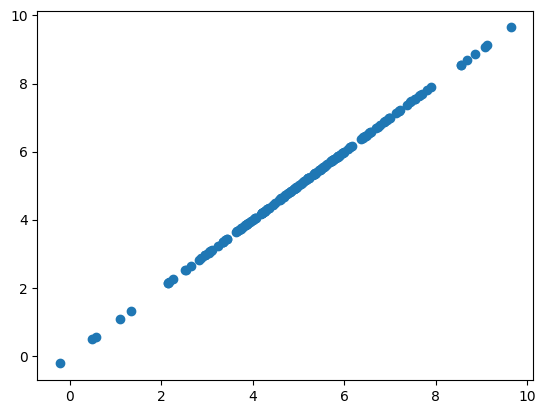

In [50]:
plt.scatter(x=df.X, y=df.Y)

In [51]:
def loss(theta):
    return np.mean(np.square(theta[0]*df.X + theta[1] - df.Y))

In [52]:
loss((1, 2))

4.0

In [53]:
theta = armijo_newton_optimization(loss, (1,1))

f=0.5624917021099177 at x=[1.00001212 0.74993278]
Iteration: 1, Gradient: [7.63755464 1.49998894]
f=0.31640862176027185 at x=[0.99999653 0.56251978]
Iteration: 2, Gradient: [5.72815916 1.12500422]
f=0.17797969484817422 at x=[0.99999821 0.42188552]
Iteration: 3, Gradient: [4.29612206 0.8437528 ]
f=0.1001137228265128 at x=[0.99999808 0.31641731]
Iteration: 4, Gradient: [3.22209063 0.63281505]
f=0.05631392008717201 at x=[0.99999882 0.23731155]
Iteration: 5, Gradient: [2.41656839 0.47461108]
f=0.03167646089259533 at x=[0.9999997  0.17798033]
Iteration: 6, Gradient: [1.81242619 0.35595764]
f=0.017818333685601765 at x=[0.99999759 0.13349761]
Iteration: 7, Gradient: [1.35931972 0.26697066]
f=0.010022688022331114 at x=[0.99999933 0.10011681]
Iteration: 8, Gradient: [1.01948982 0.20022675]
f=0.005637828821367863 at x=[0.99999869 0.07509216]
Iteration: 9, Gradient: [0.76461737 0.15017095]
f=0.0031712647176339558 at x=[0.99999924 0.05631784]
Iteration: 10, Gradient: [0.57346303 0.11262797]
f=0.00

f=0.0001785862072649999 at x=[0.99999974 0.01336493]
Iteration: 15, Gradient: [0.13608547 0.02672723]
f=0.00010045459243281684 at x=[0.99999982 0.01002362]
Iteration: 16, Gradient: [0.1020641  0.02004541]
f=5.65057686717293e-05 at x=[0.99999986 0.00751775]
Iteration: 17, Gradient: [0.07654807 0.01503406]
f=3.178451664523273e-05 at x=[0.99999989 0.00563834]
Iteration: 18, Gradient: [0.05741106 0.01127555]
f=1.7878792210607685e-05 at x=[0.99999992 0.00422875]
Iteration: 19, Gradient: [0.04305829 0.00845666]
f=1.0056825165379581e-05 at x=[0.99999994 0.00317157]
Iteration: 20, Gradient: [0.03229372 0.0063425 ]
f=5.656964070624435e-06 at x=[0.99999995 0.00237868]
Iteration: 21, Gradient: [0.02422029 0.00475687]
f=3.1820422045769497e-06 at x=[0.99999996 0.00178401]
Iteration: 22, Gradient: [0.01816522 0.00356766]
f=1.7898990952852237e-06 at x=[0.99999997 0.00133801]
Iteration: 23, Gradient: [0.01362391 0.00267574]
f=1.006818118551617e-06 at x=[0.99999998 0.00100351]
Iteration: 24, Gradient: 

In [54]:
theta = armijo_gradient_optimization(loss, (1,1))

[10.18339057  2.        ]
f=0.6279846146739692 at x=[0.96022113 0.9921875 ]
Iteration: 1, Gradient: [7.81781381 1.57929124]
f=0.4082524504734748 at x=[0.9296828  0.98601839]
Iteration: 2, Gradient: [6.00000901 1.25596923]
f=0.27844426680303125 at x=[0.90624526 0.98111226]
Iteration: 3, Gradient: [4.6031356 1.0074834]
f=0.20173666319259584 at x=[0.88826426 0.97717678]
Iteration: 4, Gradient: [3.52972389 0.8165049 ]
f=0.1563852628355658 at x=[0.87447628 0.97398731]
Iteration: 5, Gradient: [2.70487398 0.66971753]
f=0.12954991738931296 at x=[0.86391036 0.97137123]
Iteration: 6, Gradient: [2.07102958 0.55688853]
f=0.11364846379759551 at x=[0.8558204  0.96919588]
Iteration: 7, Gradient: [1.58396199 0.47015463]
f=0.10420360197581012 at x=[0.84963305 0.96735934]
Iteration: 8, Gradient: [1.20968397 0.40347333]
f=0.09857146680613901 at x=[0.84490772 0.96578327]
Iteration: 9, Gradient: [0.92207828 0.35220133]
f=0.09519084442179775 at x=[0.84130586 0.96440748]
Iteration: 10, Gradient: [0.70107532 

In [55]:
%%timeit
armijo_gradient_optimization(loss, (1,1), do_print=False)

1.04 s ± 105 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [56]:
%%timeit
armijo_newton_optimization(loss, (1,1), do_print=False)

653 ms ± 76.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [57]:
loss(theta)

0.0002032552598369361

In [58]:
theta

array([0.99190068, 0.04559882])